In [2]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [3]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

# Regionalt

In [4]:
# Get deaths data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv',encoding='latin1',delimiter=';')
df['Prøvetagningsdato'] = pd.to_datetime(df['Prøvetagningsdato'])
df.columns

Index(['Region', 'Prøvetagningsdato', 'Køn', 'Bekræftede tilfælde i alt',
       'Døde', 'Indlæggelser', 'Kummuleret antal døde',
       'Kummuleret antal bekræftede tilfælde',
       'Kummuleret antal indlæggelser'],
      dtype='object')

In [5]:
# Get map-data
gdf = gpd.read_file(rootdir_data+'Region\\Region.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]
gdf

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,105612.0,Region Hovedstaden,118711.0,2007-01-01,9999-12-31,66.0,Region,7.371152e+05,2.563160e+09,MULTIPOLYGON Z (((893016.809 6147736.924 0.000...
1,105615.0,Region Sjælland,118712.0,2011-11-27,9999-12-31,66.0,Region,2.196684e+06,7.216493e+09,MULTIPOLYGON Z (((727211.919 6095342.754 0.000...
2,105616.0,Region Syddanmark,118713.0,2007-01-01,9999-12-31,66.0,Region,2.436420e+06,1.209603e+10,MULTIPOLYGON Z (((608271.732 6065789.756 0.000...
3,105620.0,Region Midtjylland,118715.0,2011-01-01,9999-12-31,66.0,Region,2.564054e+06,1.299856e+10,MULTIPOLYGON Z (((663400.204 6291476.405 0.000...
8,105617.0,Region Nordjylland,118714.0,2007-01-01,9999-12-31,66.0,Region,1.697705e+06,7.870127e+09,MULTIPOLYGON Z (((619813.130 6343486.648 0.000...


(0.0, 29.4)

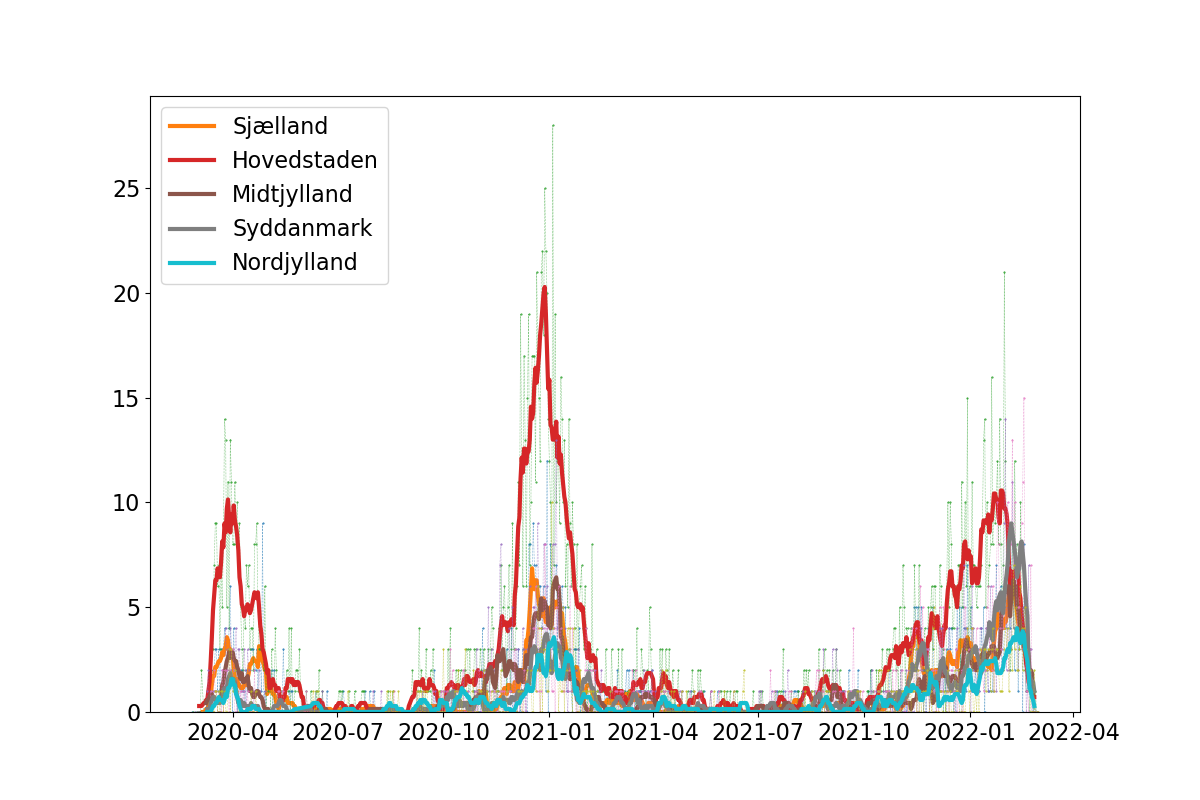

In [6]:
# As a test, plot time-series
df.columns
dfReg = df.groupby(['Region','Prøvetagningsdato']).sum()

plt.figure() 

k = 0
allRegion = df.Region.unique()
for k in range(len(allRegion)):
    curRegion = allRegion[k]
    curdf = dfReg.loc[curRegion]
    curDates = curdf.index

    plt.plot(curDates,curdf['Døde'],'.:',markersize=1,linewidth=0.4)
    plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Døde']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Indlæggelser']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Bekræftede tilfælde i alt']),label=curRegion)

plt.legend()
plt.ylim(bottom=0)

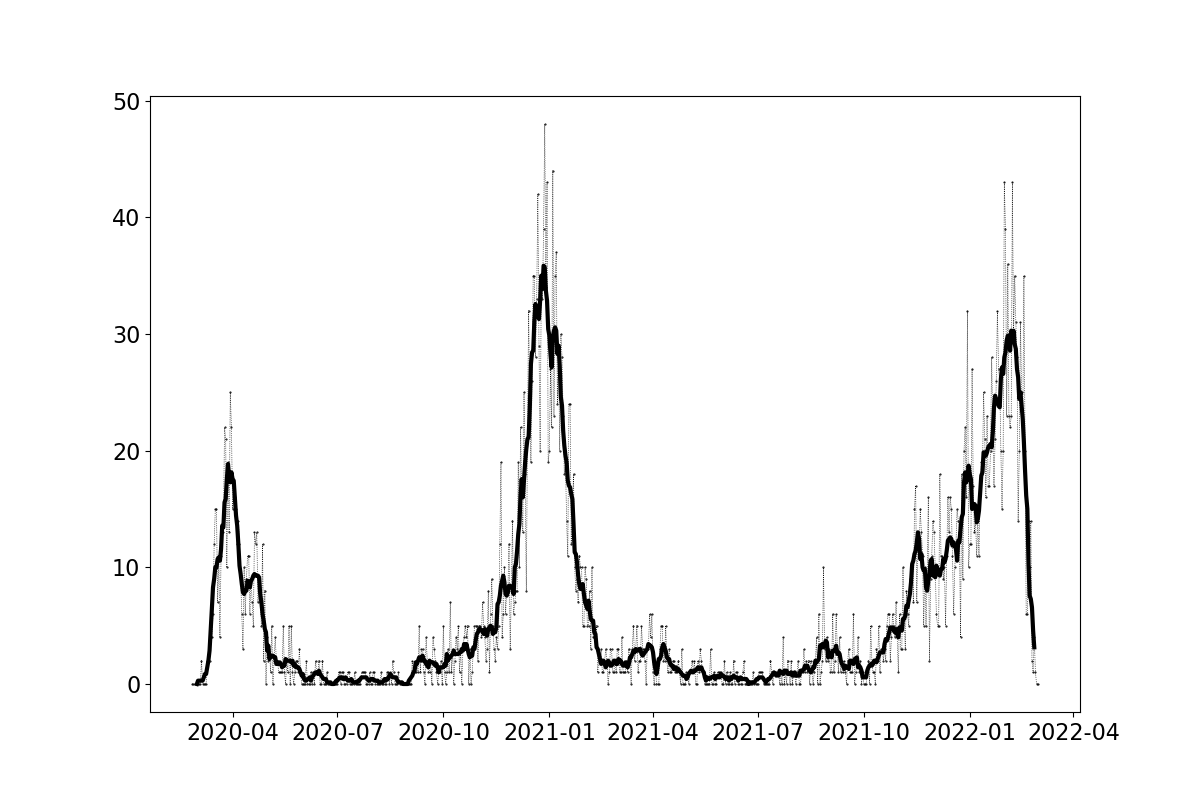

In [7]:
alldf = df.groupby('Prøvetagningsdato').sum()

plt.figure() 
plt.plot(alldf.index,alldf['Døde'],'.:k',markersize=1,linewidth=0.5)
plt.plot(pf.rnTime(alldf.index),pf.rnMean(alldf['Døde']),'k')

In [8]:
def getPointsWithin(geometry,N):
    x_min, y_min, x_max, y_max = geometry.bounds

    # generate random data within the bounds
    x = np.random.uniform(x_min, x_max, N*2)
    y = np.random.uniform(y_min, y_max, N*2)

    # convert them to a points GeoSeries
    gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
    # only keep those points within polygons
    gdf_points = gdf_points[gdf_points.within(geometry)]

    while (len(gdf_points) < N):
        
        # generate random data within the bounds
        x = np.random.uniform(x_min, x_max,N)
        y = np.random.uniform(y_min, y_max,N)

        # w = x_max-x_min
        # h = y_max-y_min
        # x_mid = (x_max+x_min)/2
        # y_mid = (y_max+y_min)/2
        # x = np.random.uniform(0,w,N) + x_mid
        # y = np.random.uniform(0,h,N) + y_mid

        # convert them to a points GeoSeries
        gdf_points_new = gpd.GeoSeries(gpd.points_from_xy(x, y))
        # only keep those points within polygons
        gdf_points_new = gdf_points_new[gdf_points_new.within(geometry)]

        gdf_points = pd.concat([gdf_points,gdf_points_new])


    return gdf_points.iloc[:N]



In [9]:
# def getPointsWithinCPH(geometry,N):
#     x_min, y_min, x_max, y_max = geometry.bounds
    
#     x_min = 6.7e5
#     x_max = 7.4e5
#     y_min = 6.15e6
#     y_max = 6.227e6

#     # generate random data within the bounds
#     x = np.random.uniform(x_min, x_max, N*2)
#     y = np.random.uniform(y_min, y_max, N*2)

#     # convert them to a points GeoSeries
#     gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
#     # only keep those points within polygons
#     gdf_points = gdf_points[gdf_points.within(geometry)]

#     while (len(gdf_points) < N):
        
#         # generate random data within the bounds
#         x = np.random.uniform(x_min, x_max,N)
#         y = np.random.uniform(y_min, y_max,N)

#         # w = x_max-x_min
#         # h = y_max-y_min
#         # x_mid = (x_max+x_min)/2
#         # y_mid = (y_max+y_min)/2
#         # x = np.random.uniform(0,w,N) + x_mid
#         # y = np.random.uniform(0,h,N) + y_mid

#         # convert them to a points GeoSeries
#         gdf_points_new = gpd.GeoSeries(gpd.points_from_xy(x, y))
#         # only keep those points within polygons
#         gdf_points_new = gdf_points_new[gdf_points_new.within(geometry)]

#         gdf_points = pd.concat([gdf_points,gdf_points_new])


#     return gdf_points.iloc[:N]



In [10]:
def getGeo(curReg):
    curgdf = gdf[gdf.navn == ('Region ' +curReg)]
    return curgdf


In [11]:

allDates = df.Prøvetagningsdato.unique()

fulldf = pd.DataFrame()

lastToUse = len(allDates)
fulldf['Date'] = allDates[:lastToUse]

# curRegion = 'Nordjylland'
# curRegion = 'Hovedstaden'
for curRegion in df.Region.unique():
    print(curRegion)

    curdf = dfReg.loc[curRegion]
    curDates = curdf.index
    curDeaths = curdf['Døde']

    curReggdf = getGeo(curRegion)

    allPoints = []

    for k in range(0,lastToUse):
        curDate = allDates[k]   
        curIndex = np.where(curDate == curDates)[0]
        if (len(curIndex) > 0):
            thisDeaths = curDeaths[curIndex].values[0]
            if (thisDeaths > 0):
                if (curRegion == 'Hovedstaden'):
                    pointsToShow = getPointsWithin(curReggdf.iloc[0].geometry.geoms[32:-10],thisDeaths)
                else:
                    pointsToShow = getPointsWithin(curReggdf.iloc[0].geometry,thisDeaths)

                allPoints.append(pointsToShow)
            else:
                allPoints.append([None])
        else:
            allPoints.append([None])

        # if ((k % 10)==0):
        #     print(k)

    fulldf[curRegion] = allPoints


Sjælland
Hovedstaden
Midtjylland
Syddanmark
Nordjylland


In [12]:
plt.close('all')

In [13]:
# fig,ax = plt.subplots() 

# gdf.plot(ax=ax,color='xkcd:midnight blue')

# fig.patch.set_facecolor('xkcd:off white')
# ax.set_facecolor('xkcd:off white')

In [15]:

# curDate = allDates[curDateIndex] 
# from  datetime import datetime 
# datetime.strptime(pd.to_datetime(curDate), '%d')
# pd.to_datetime(curDate).strftime('%d. %B - %Y')

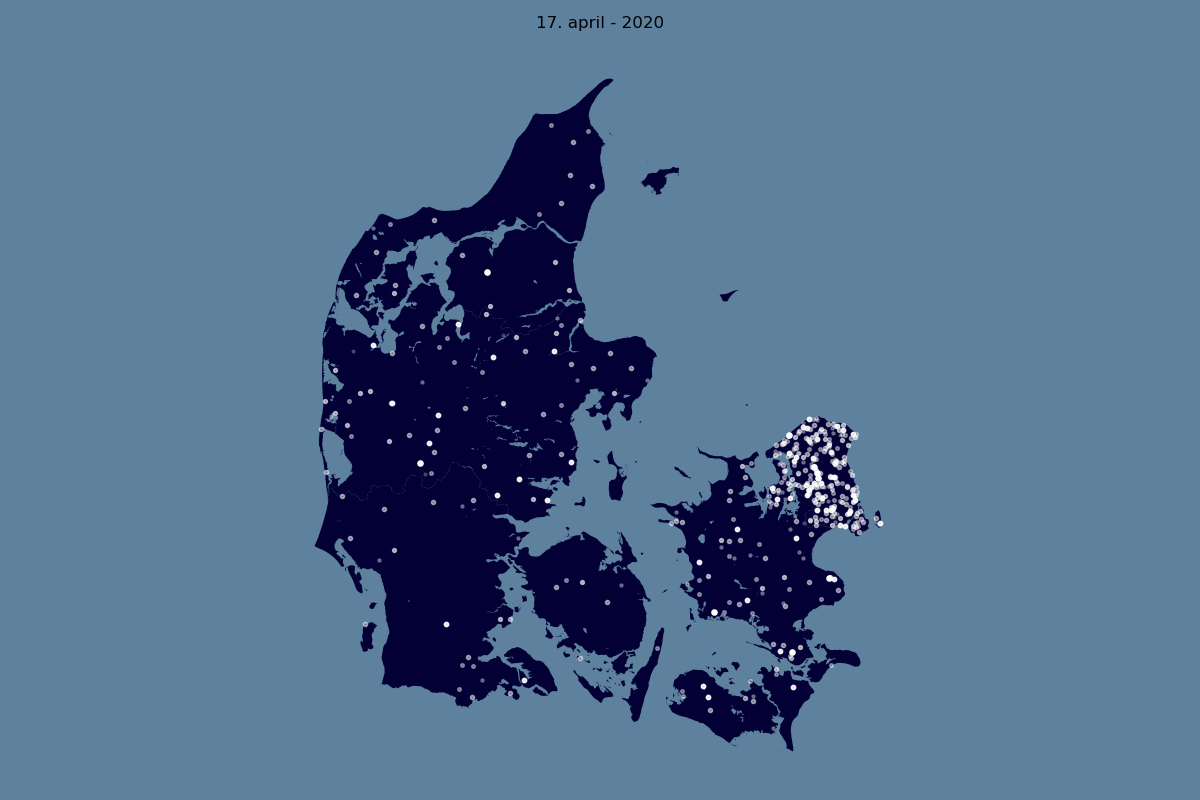

In [16]:
fig,ax = plt.subplots() 

gdf.plot(ax=ax,color='xkcd:midnight blue')

fig.patch.set_facecolor('xkcd:greyish blue')
ax.set_facecolor('xkcd:greyish blue')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# curDateIndex = len(allPoints)
curDateIndex = 50

curDate = allDates[curDateIndex]   

curDateString = pd.to_datetime(curDate).strftime('%d. %B - %Y')

fig.suptitle(curDateString)



for curRegion in df.Region.unique():
    curPoints = fulldf[curRegion]

    for x in curPoints[:curDateIndex-35]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.2,markersize=4) 
            
    for x in curPoints[curDateIndex-35:curDateIndex-28]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.3,markersize=5) 
            
    for x in curPoints[curDateIndex-28:curDateIndex-21]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.4,markersize=7) 
            
    for x in curPoints[curDateIndex-21:curDateIndex-14]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.5,markersize=9) 
            
            
    for x in curPoints[curDateIndex-14:curDateIndex-7]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.6,markersize=8) 
            
    for x in curPoints[curDateIndex-7:curDateIndex]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=0.9,markersize=10) 
            
    x = curPoints[curDateIndex]
    if (type(x) != list):
        x.plot(ax=ax,color='xkcd:white',alpha=1,markersize=14) 

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([4.38e5,7.44e5])


fig.tight_layout()


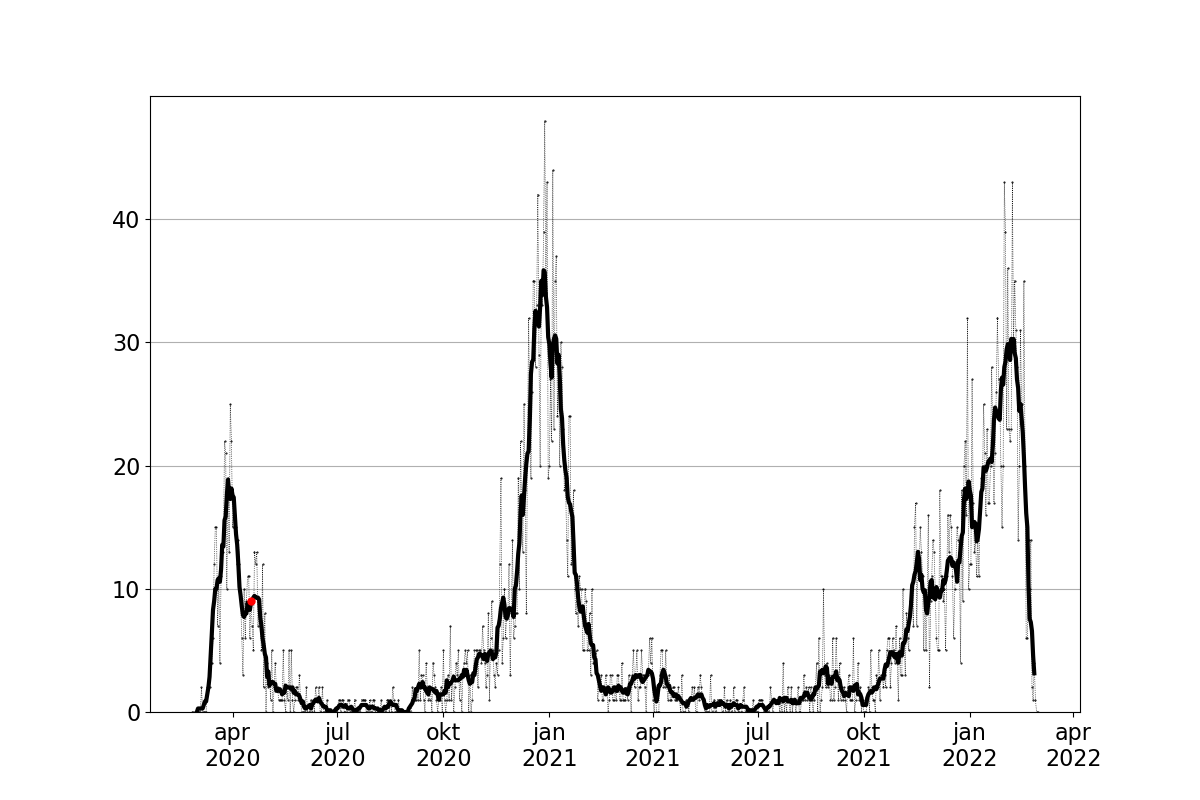

In [17]:
alldf = df.groupby('Prøvetagningsdato').sum()

fig,ax2 = plt.subplots()
ax2.plot(alldf.index,alldf['Døde'],'.:k',markersize=1,linewidth=0.5)
ax2.plot(pf.rnTime(alldf.index),pf.rnMean(alldf['Døde']),'k')

thisIndex = np.where(curDate == alldf.index)[0][0]

ax2.plot(alldf.index[thisIndex],alldf['Døde'][thisIndex],'r.')

ax2.set_ylim(bottom=0,top=50)
ax2.set_yticks([0,10,20,30,40])
ax2.grid(axis='y')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

In [18]:

# for x in curPoints[curFirstIndex,curLastIndex]:
# cur

In [19]:
# fig,ax,ax2 = plt.subplots(2,1, gridspec_kw={'width_ratios': [3, 1]}) 

counter = 0 

# for curDateIndex in [50,100,150,200,250,300]:
# for curDateIndex in np.arange(0,250,1):
for curDateIndex in np.arange(0,len(fulldf)):
    counter = counter+1

    plt.close('all')

    fig,(ax,ax2) = plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [6, 1]}) 

    gdf.plot(ax=ax,color='xkcd:midnight blue')

    fig.patch.set_facecolor('xkcd:greyish blue')
    ax.set_facecolor('xkcd:greyish blue')
    ax2.set_facecolor('xkcd:greyish blue')

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # curDateIndex = len(allPoints)
    # curDateIndex = 50


    curDate = allDates[curDateIndex]   

    curDateString = pd.to_datetime(curDate).strftime('%d. %B - %Y')

    # fig.suptitle(curDateString)
    ax2.set_title(curDateString)



    for curRegion in df.Region.unique():
        curPoints = fulldf[curRegion]

        curFirstIndex = 0
        curLastIndex = np.max([0,curDateIndex-35])
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.1,markersize=3) 
                
        curFirstIndex = np.max([0,curDateIndex-35])
        curLastIndex = np.max([0,curDateIndex-28])
        # for x in curPoints[curDateIndex-35:curDateIndex-28]:
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.2,markersize=3) 
                
        curFirstIndex = np.max([0,curDateIndex-28])
        curLastIndex = np.max([0,curDateIndex-21])
        # for x in curPoints[curDateIndex-28:curDateIndex-21]:
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.25,markersize=3) 
                
        curFirstIndex = np.max([0,curDateIndex-21])
        curLastIndex = np.max([0,curDateIndex-14])
        # for x in curPoints[curDateIndex-21:curDateIndex-14]:
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.3,markersize=4) 
                
                
        curFirstIndex = np.max([0,curDateIndex-14])
        curLastIndex = np.max([0,curDateIndex-7])
        # for x in curPoints[curDateIndex-14:curDateIndex-7]:
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.35,markersize=5) 
                
        curFirstIndex = np.max([0,curDateIndex-7])
        curLastIndex = curDateIndex
        # for x in curPoints[curDateIndex-7:curDateIndex]:
        for x in curPoints[curFirstIndex:curLastIndex]:
            if (type(x) != list):
                x.plot(ax=ax,color='xkcd:white',alpha=0.4,markersize=6) 
                
        x = curPoints[curDateIndex]
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:white',alpha=1,markersize=14) 

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([4.38e5,7.44e5])

    # Plot below
    alldf = df.groupby('Prøvetagningsdato').sum()

    ax2.plot(alldf.index,alldf['Døde'],'.:k',markersize=1,linewidth=0.5)
    ax2.plot(pf.rnTime(alldf.index),pf.rnMean(alldf['Døde']),'k')

    thisIndex = np.where(curDate == alldf.index)[0][0]

    ax2.plot(alldf.index[thisIndex],alldf['Døde'][thisIndex],'r.')

    ax2.set_ylim(bottom=0,top=50)
    ax2.set_yticks([0,10,20,30,40])
    ax2.grid(axis='y',alpha=0.3)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


    fig.tight_layout()

    if saveFigures:
        fig.savefig(os.getcwd()+'/../../animationFrames/frame'+str(counter))
    print(f'Frame: {counter}, index: {curDateIndex}, date: {curDateString}')

Frame: 1, index: 0, date: 26. februar - 2020
Frame: 2, index: 1, date: 27. februar - 2020
Frame: 3, index: 2, date: 28. februar - 2020
Frame: 4, index: 3, date: 01. marts - 2020
Frame: 5, index: 4, date: 02. marts - 2020
Frame: 6, index: 5, date: 03. marts - 2020
Frame: 7, index: 6, date: 04. marts - 2020
Frame: 8, index: 7, date: 05. marts - 2020
Frame: 9, index: 8, date: 06. marts - 2020
Frame: 10, index: 9, date: 07. marts - 2020
Frame: 11, index: 10, date: 08. marts - 2020
Frame: 12, index: 11, date: 09. marts - 2020
Frame: 13, index: 12, date: 10. marts - 2020
Frame: 14, index: 13, date: 11. marts - 2020
Frame: 15, index: 14, date: 12. marts - 2020
Frame: 16, index: 15, date: 13. marts - 2020
Frame: 17, index: 16, date: 14. marts - 2020
Frame: 18, index: 17, date: 15. marts - 2020
Frame: 19, index: 18, date: 16. marts - 2020
Frame: 20, index: 19, date: 17. marts - 2020
Frame: 21, index: 20, date: 18. marts - 2020
Frame: 22, index: 21, date: 19. marts - 2020
Frame: 23, index: 22, d

'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\notebooks/../..'

# Old

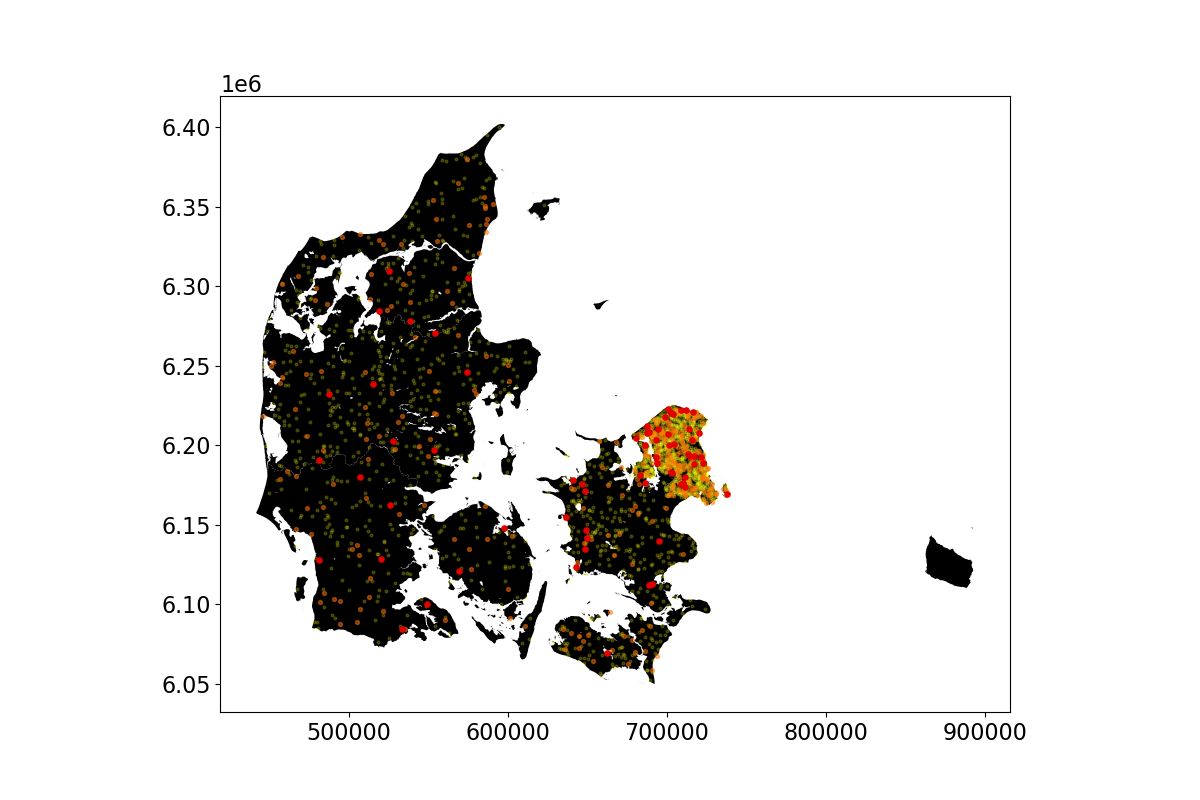

In [ ]:
fig,ax = plt.subplots() 

gdf.plot(ax=ax,color='k')

curDateIndex = len(allPoints)-15


for curRegion in df.Region.unique():
    curPoints = fulldf[curRegion]

    for x in curPoints[:curDateIndex-30]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:yellow',alpha=0.2,markersize=4) 
            
    for x in curPoints[curDateIndex-30:curDateIndex-7]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:orange',alpha=0.5,markersize=8) 
            
    for x in curPoints[curDateIndex-7:]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:red',alpha=1,markersize=14) 

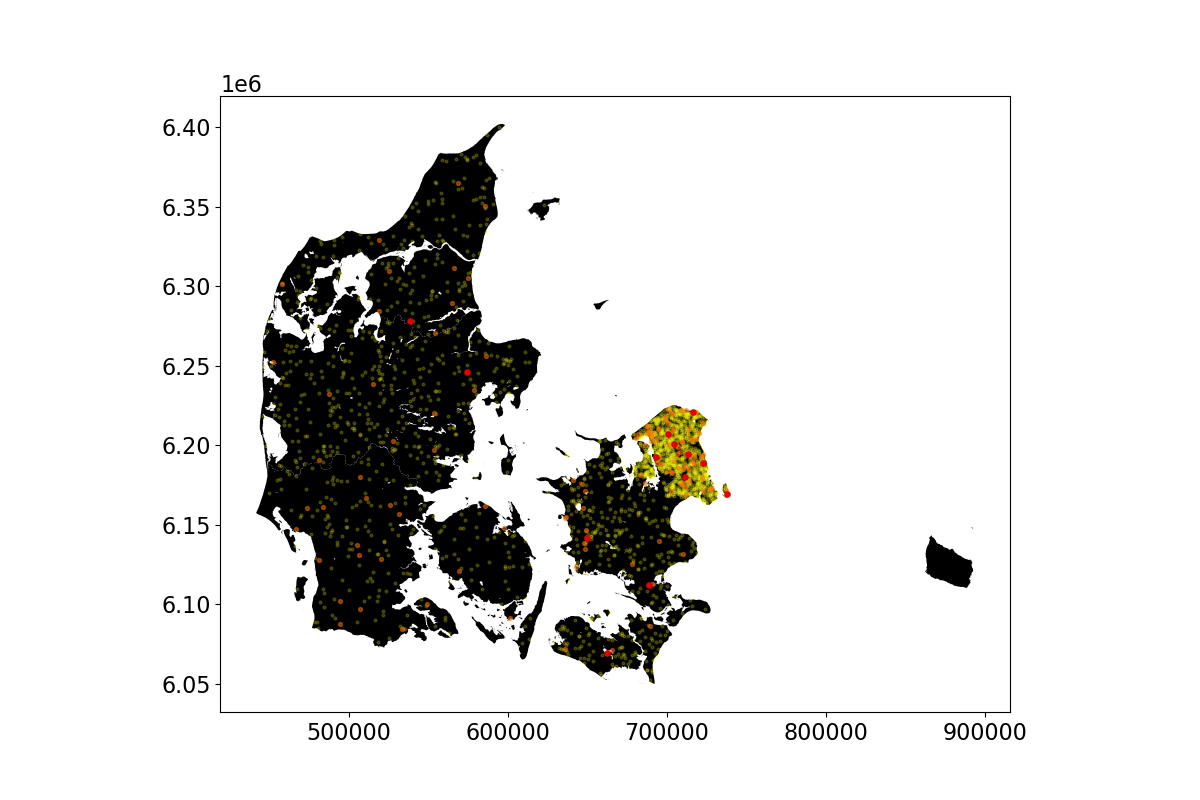

In [ ]:
fig,ax = plt.subplots() 

gdf.plot(ax=ax,color='k')

curDateIndex = len(allPoints)


for curRegion in df.Region.unique():
    curPoints = fulldf[curRegion]

    for x in curPoints[:curDateIndex-30]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:yellow',alpha=0.2,markersize=4) 
            
    for x in curPoints[curDateIndex-30:curDateIndex-7]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:orange',alpha=0.5,markersize=8) 
            
    for x in curPoints[curDateIndex-7:]:
        if (type(x) != list):
            x.plot(ax=ax,color='xkcd:red',alpha=1,markersize=14) 

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_23616\2006656608.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  gdf.iloc[0].geometry[32:-10]


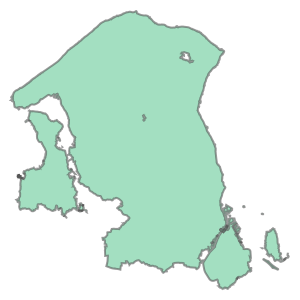

In [ ]:
gdf.iloc[0].geometry[32:-10]
# gdf.iloc[0].geometry[:32]

# x_min = 6.7e5
# x_max = 7.4e5
# y_min = 6.15e6
# y_max = 6.227e6

In [ ]:
# regDates = dfReg.loc[['Hovedstaden']].index

curRegion = 'Hovedstaden'
curdf = dfReg.loc[curRegion]
curDates = curdf.index
curDeaths = curdf['Døde']

(array([33], dtype=int64),)

In [ ]:
# curReg = 'Hovedstaden'

# allDates = df.Prøvetagningsdato.unique()


# allPoints = []

# # for k in range(0,len(allDates)):
# # for k in range(0,len(allDates)-100):
# for k in range(0,100):
#     curDate = allDates[k]   
#     thisdf = df.loc[(df.Prøvetagningsdato==curDate) & (df.Region == curReg)]
#     if (len(thisdf) > 0):
#         curCount = thisdf.iloc[0]['Døde']
#         curReggdf = getGeo(curReg)
#         pointsToShow = getPointsWithin(curReggdf.iloc[0].geometry,curCount)

#         allPoints.append(pointsToShow)
#     else:
#         allPoints.append([None])

#     if ((k % 10)==0):
#         print(k)

In [ ]:
allPoints

In [ ]:
# fig,ax = plt.subplots() 

# gdf.plot(ax=ax,color='k')

# curDateIndex = len(allDates)-100

# # allPoints[-1].plot(ax=ax,color='b')
# for x in allPoints[:curDateIndex-30]:
#     if (type(x) != list):
#         x.plot(ax=ax,color='xkcd:yellow',alpha=0.2,markersize=4) 
        
# for x in allPoints[curDateIndex-30:curDateIndex-7]:
#     if (type(x) != list):
#         x.plot(ax=ax,color='xkcd:orange',alpha=0.5,markersize=8) 
        
# for x in allPoints[curDateIndex-7:]:
#     if (type(x) != list):
#         x.plot(ax=ax,color='xkcd:red',alpha=1,markersize=14) 

In [ ]:
# allDates = df.Dato.unique()


# for k in range(199,202):
#     curDate = allDates[k]

#     dfDate = df[df.Dato==curDate]

#     fig,ax = plt.subplots() 

#     gdf.plot(ax=ax,color='k')

#     for i in range(len(dfDate)):
#         curKom = dfDate.iloc[i].Kommunenavn
#         curCount = dfDate.iloc[i]['Bekræftede tilfælde i alt']
#         # print(f'{curKom}: {curCount}')

#         curkomgdf = getGeo(curKom)
#         pointsToShow = getPointsWithin(curkomgdf.iloc[0].geometry,curCount)
#         pointsToShow.plot(ax=ax,color='b',markersize=3)

#     ax.set_title(curDate)

In [ ]:
# gdfCurRegion =  gdf.iloc[1]
# x_min, y_min, x_max, y_max = gdfCurRegion.geometry.bounds

# # set sample size
# n = 100
# # generate random data within the bounds
# x = np.random.uniform(x_min, x_max, n)
# y = np.random.uniform(y_min, y_max, n)

# # convert them to a points GeoSeries
# gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
# # # only keep those points within polygons
# # gdf_points = gdf_points[gdf_points.within(gdfCurRegion)]
# gdf_points = gdf_points[gdf_points.within(gdfCurRegion.geometry)]

# fig,ax = plt.subplots()
# gdf.plot(ax=ax,color='k')
# gdf_points.plot(ax=ax)

In [ ]:
# # gdf_points[gdf_points.within(gdfCurRegion)]
# gdf_points[gdf_points.within(gdfCurRegion.geometry)]